# Measuring Learning Outcomes for Pretest and Postest

if action type is 4 or 3 then print that there was the submission of the activity


for every student
for every test
for every row
we want to evaluate how well they did in that activity
- correct or not? is mst
- cost of their solution?
    - normalize by cost-opt cost / cost percentage [check other repo]
- avgerage error in pretest is their preknowledge
- max error
- min error
- future boxplots? for errors 

stage 1: connectedness
    stage2: how costly it was from the original
       


create dictionary of precomputed opt_cost based for every problem

do eval on
1. check if thir solution spans the network (is_spanning property) state.py
2. cost (get_cost function)
    a. normalize: get cost, get the state's graph and get_graph_cost optimal cost 

In [1]:
from justhink_problem.problem import init_problem, reset_problem
from justhink_problem.domain.state import WorldState
import pathlib as pl
import pickle
import pandas as pd
import copy

# Define paths.

In [2]:
processed_tables_pickle_file = pl.Path(
    '../processed_data/processed_tables.pickle')

# Load pickled data.

In [3]:
with processed_tables_pickle_file.open('rb') as handle:
    processed_tables = pickle.load(handle)

In [4]:
processed_tables.keys()

dict_keys([6, 1, 8, 9, 7, 2, 5, 4, 3, 10])

In [20]:
# get the submission rows
# drop the unnecessary columns, keep state, activity, imported info
# drop multiple submission just keep last ones
# compute error for each test for each child

df = processed_tables[1].copy()
df = df[df['is_submission']]

df.drop(['Time', 'header.seq', 'state.edges', 'state.suggested.u', 'state.suggested.v', 'state.terminal', 'state.submit_suggested', 'action.type', 'action.edge.u', 'action.edge.v', 'turn_agent', 'next_state.edges', 'next_state.suggested.u', 'next_state.suggested.v',
        'next_state.terminal', 'next_state.submit_suggested', 'action_no', 'step_no'], axis=1, inplace=True)
df

#do this for all of the keys in the dict 
#calculate the normalized values for comparison
#make a new table with all of this information to compare students with each other


,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst
11,pretest-1,human,"WorldState(n:7,e:12|e:7,c:23,s:True,t:False)",True,23,False
12,pretest-1,human,"WorldState(n:7,e:12|e:7,c:23,s:True,t:False)",True,23,False
20,pretest-2,human,"WorldState(n:7,e:12|e:7,c:38,s:True,t:False)",True,38,False
21,pretest-2,human,"WorldState(n:7,e:12|e:7,c:38,s:True,t:False)",True,38,False
29,pretest-3,human,"WorldState(n:7,e:12|e:6,c:22,s:True,t:False)",True,22,False
30,pretest-3,human,"WorldState(n:7,e:12|e:6,c:22,s:True,t:False)",True,22,False
37,pretest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,False
38,pretest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,False
45,pretest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,False
46,pretest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,False


In [21]:
#create dictionary of precomputed opt_cost based for every problem

max_costs = []
spanning = []

for i, row in df.iterrows():
    max_costs.append(row['world_state'].get_mst_cost())
    spanning.append(row['world_state'].is_spanning())


df['mst_cost'] = max_costs
df['spanning'] = spanning
df

,header.frame_id,action.agent_name,world_state,is_submission,cost,is_mst,mst_cost,spanning
11,pretest-1,human,"WorldState(n:7,e:12|e:7,c:23,s:True,t:False)",True,23,False,15,True
12,pretest-1,human,"WorldState(n:7,e:12|e:7,c:23,s:True,t:False)",True,23,False,15,True
20,pretest-2,human,"WorldState(n:7,e:12|e:7,c:38,s:True,t:False)",True,38,False,30,True
21,pretest-2,human,"WorldState(n:7,e:12|e:7,c:38,s:True,t:False)",True,38,False,30,True
29,pretest-3,human,"WorldState(n:7,e:12|e:6,c:22,s:True,t:False)",True,22,False,21,True
30,pretest-3,human,"WorldState(n:7,e:12|e:6,c:22,s:True,t:False)",True,22,False,21,True
37,pretest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,False,45,True
38,pretest-4,human,"WorldState(n:7,e:12|e:6,c:45,s:True,t:False)",True,45,False,45,True
45,pretest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,False,15,True
46,pretest-5,human,"WorldState(n:7,e:12|e:6,c:15,s:True,t:False)",True,15,False,15,True


# Compute relative learning gain (RLG) [1].

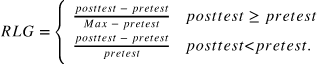

[1] M. Sangin, G. Molinari, M.-A. Nüssli, and P. Dillenbourg, “Facilitating peer knowledge modeling: Effects of a knowledge awareness tool on collaborative learning outcomes and processes,” Computers in Human Behavior, vol. 27, no. 3, pp. 1059–1067, May 2011, doi: 10.1016/j.chb.2010.05.032.